### Requirements:
- keras
- h5py
- tensorflow

In [1]:
from utils.plot.import_library_plot import *
import numpy as np
import matplotlib.pyplot as plt
from utils.functions import save_object, load_object
from utils.model_prior_real_data import Model_Prior

Using TensorFlow backend.


## Functions

In [2]:
def run_demo(model='inpainting', data='mnist', category=0, 
            p_rem=1, type_rem='uniform', Delta=0.001,
            seed=0, max_iter=1000, save_fig=False, block=False):
    
    ## Choose Model ##
    if model == 'inpainting':
        model_params = {'name': 'inpainting',
                        'N': 784, 'p_rem': p_rem, 'type': type_rem}
    elif model == 'denoising':
        model_params = {'name': 'denoising',
                        'N': 784, 'Delta': Delta}
    else:
        raise NotImplementedError('Models available for demo: [inpainting, denoising]')

    ## Choose Data ##
    if data in ['mnist', 'fashion_mnist']:
        data_params = {'name': data, 'category': category}
        prior_params = {'name': 'VAE', 'type': data,
                        'id': '20_relu_400_sigmoid_784_bias'}
    else:
        raise NotImplementedError('Dataset available for demo: [mnist, fashion_mnist]')

    ## Run EP ##
    EP = Model_Prior(model_params=model_params, data_params=data_params,
                     prior_params=prior_params, seed=seed)
    EP.setup()
    mse_ep, mse = EP.run_ep(max_iter=max_iter)
  

    if model == 'inpainting':
        EP.y_true['y'] = EP.y_inp
        
    dic = {'model': model, 'Delta': Delta, 'p_rem': p_rem, 'category': category, 'seed': seed,
           'y': EP.y_true['y'], 'x': EP.x_true['x'], 'x_pred': EP.x_pred['x']}

    return dic

In [3]:
def plot_VAE(dic, save_fig=False):
    _, axes = plt.subplots(1, 3)
    cmap = 'gray'
    axes[0].imshow(dic['x'].reshape(28, 28), cmap=cmap, vmin=-1, vmax=1)
    axes[1].imshow(dic['y'].reshape(28, 28), cmap=cmap,vmin=np.min(dic['y']), vmax=np.max(dic['y']))
    axes[2].imshow(dic['x_pred'].reshape(28, 28), cmap=cmap, vmin=-1, vmax=1)

    """ Titles  """
    axes[0].set_title(r'$x^*$')
    axes[1].set_title(r'$y$')
    axes[2].set_title(r'$\hat{x}$')

    """ Ticks   """
    axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].set_xticks([]), axes[1].set_yticks([])
    axes[2].set_xticks([]), axes[2].set_yticks([])

    """ Save   """
    if save_fig:
        dir_fig = 'Figures/'
        os.makedirs(dir_fig) if not os.path.exists(dir_fig) else 0
        file_name = f'{dir_fig}{dic["model"]}_Delta={dic["Delta"]:.0f}_nrem={dic["n_rem"]:.0f}_cat={dic["category"]}_seed={dic["seed"]}.pdf'

        plt.tight_layout()
        plt.savefig(file_name, format='pdf', dpi=1000,
                    bbox_inches="tight", pad_inches=0.1)

    """ Show   """
    plt.show()

## Run EP on MNIST

In [4]:
## Parameters
max_iter = 1000

### Uniform inpainting

mse_ep: 0.001 mse:  0.146


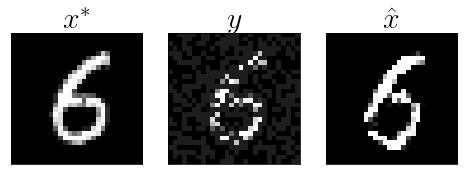

In [5]:
model, p_rem, type_rem = 'inpainting', 50, 'uniform'
data, category, seed = 'mnist', 6, 1

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, p_rem=p_rem, type_rem=type_rem, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.002 mse:  0.077


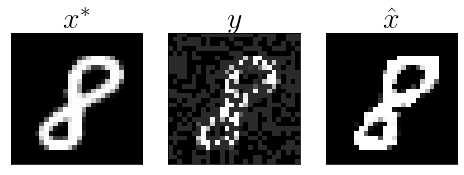

In [6]:
model, p_rem, type_rem = 'inpainting', 50, 'uniform'
data, category, seed= 'mnist', 8, 5

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, p_rem=p_rem, type_rem=type_rem, seed=seed)
plot_VAE(dic, save_fig=False)

### Central band inpainting

mse_ep: 0.001 mse:  0.088


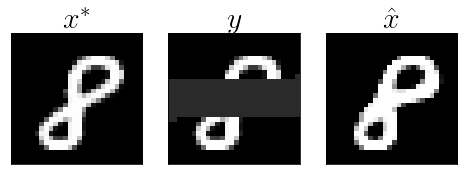

In [7]:
model, p_rem, type_rem = 'inpainting', 29, 'band'
data, category, seed = 'mnist', 8, 5
dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, p_rem=p_rem, type_rem=type_rem, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.001 mse:  0.138


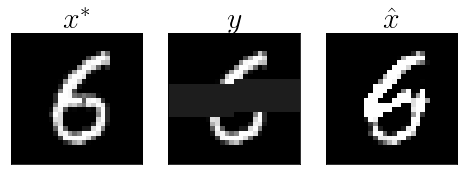

In [8]:
model, p_rem, type_rem = 'inpainting', 25, 'band'
data, category = 'mnist', 6
seed = 1
dic = run_demo(model=model, data=data, category=category, max_iter=1000, p_rem=p_rem, type_rem=type_rem, seed=seed)
plot_VAE(dic, save_fig=False)

### Denoising

mse_ep: 0.109 mse:  0.051


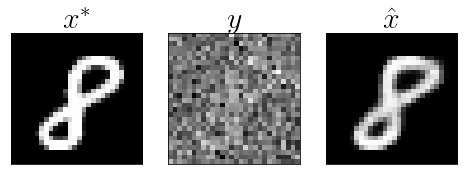

In [9]:
model, Delta = 'denoising', 4
data, category, seed = 'mnist', 8, 5

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, Delta=Delta, seed=seed)
plot_VAE(dic)

mse_ep: 0.127 mse:  0.082


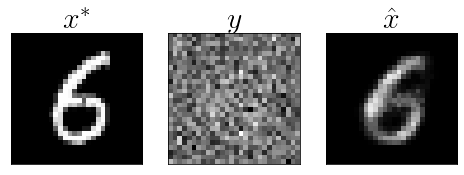

In [10]:
model, Delta = 'denoising', 4
data, category, seed = 'mnist', 6, 1

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

## Run EP on FashionMnist

mse_ep: 0.093 mse:  0.143


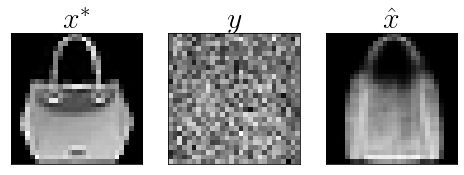

In [11]:
model, Delta = 'denoising', 4
data, category, seed = 'fashion_mnist', 8, 1

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.079 mse:  0.123


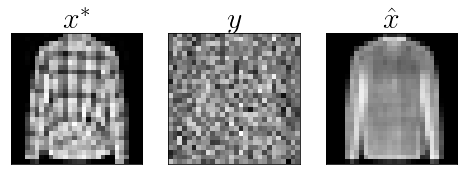

In [12]:
model, Delta = 'denoising', 4
data, category, seed = 'fashion_mnist', 6, 1

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)

mse_ep: 0.081 mse:  0.091


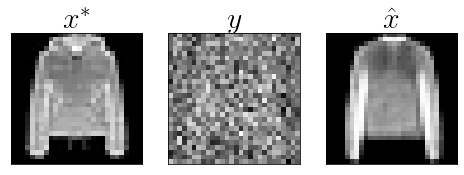

In [13]:
model, Delta = 'denoising', 4
data, category, seed = 'fashion_mnist', 4, 1

dic = run_demo(model=model, data=data, category=category, max_iter=max_iter, Delta=Delta, seed=seed)
plot_VAE(dic, save_fig=False)
